#1 - Introdução - Conceito de Retorno Simples

Primeira coisa que você tem que entender é que Taxa de Retorno é diferente de Rendimento. O Rendimento de uma ação/ativo é a divisão simples dentre o preço inicial e o preço final, já a taxa de retorno é uma comparação entre o lucro e o valor inicial investido, ou seja,  e a divisão entre a diferença de preços inical e final do ativo e o preço incial.

Em formulas temos que:

- RETRONO SIMPLES = Lucro/Ivestimento incial = [(Preço Venda - Preço Compra) / Preço Compra ]*100


- RENDIMENTO SIMPLES = (Preço Final/ Preço Incial)*100

Vamos calcular a Taxa de Retorno Simples - RS - das nossas açoes (carteira) que estavamos usando no notebook passado:

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

instalando a API do Yahoo finanças

In [ ]:
!pip install -q yfinance

In [ ]:
import yfinance as yf

Impostando ações com a API

In [ ]:
acoes = ["GOLL4.SA", "CVCB3.SA", "WEGE3.SA", "MGLU3.SA", "TOTS3.SA", "BOVA11.SA"]

acoes_df = pd.DataFrame()
for i in acoes:
  acoes_df[i] = yf.download(i, start='2015-01-01')['Close']

#Renomemando as colunas
acoes_df.rename(columns={"GOLL4.SA":"GOL", "CVCB3.SA":"CVC", "WEGE3.SA":"WEGE",
                         "MGLU3.SA":"MAGALU", "TOTS3.SA":"TOTVS", "BOVA11.SA":"BOVA"}, inplace = True)
acoes_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,GOL,CVC,WEGE,MAGALU,TOTVS,BOVA
Date,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
2022-12-08,7.52,4.30,37.200001,2.840000,27.040001,103.570000
2022-12-09,7.28,4.25,37.099998,2.800000,26.760000,103.900002
2022-12-12,7.62,4.26,36.070000,2.800000,26.080000,101.660004


Com as informações da tabela podemos fazer o cálculo do retorno simples de cada uma das alçoes dentro do período de 01/01/2015 até 09/12/2022:

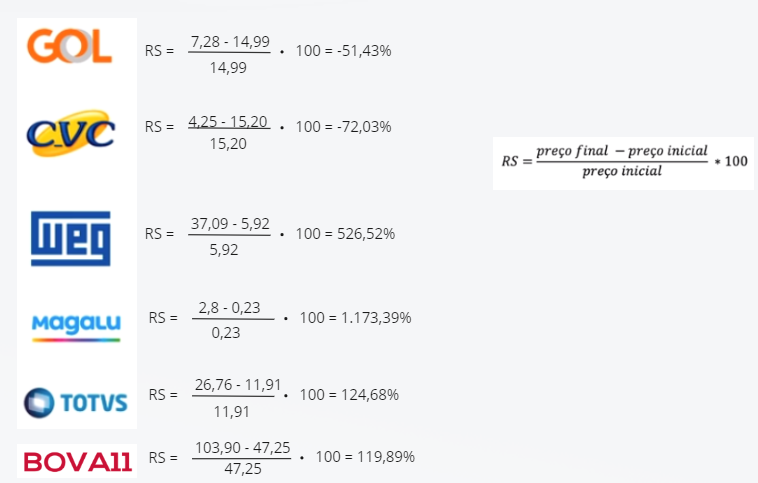

##1.1 - Taxa de Retorno Simples com Dividendos e Taxas de Compra e Venda

Como o nome explica, o que vamos fazer agora é calcular a taxa de Retorno levando em consideração alguns gastos que na vida real teriamos na hora de negociar ações na bolsa com uma corretara. São eles:

- Taxa de Compra.
  - A corretora geralmente não cobra por quantidade de ações compradas, mas sim pela ação de comprar um ou mais ações num determinado momento.
  - Logo, lógicamente como a taxa será mesma seja lá qual for a quantidade de ações, o que mais vale a apena é comprar várias ações de uma vez só.
- Taxa de Venda.
  - A lógica para a venda é a mesma, a corretora vai cobrar uma taxa pela ação de vender, não importando a quantidade vendida.
  - Logicamente, é mais vantajoso para o detentor das ações vender várias ações de uma vez só.

Também vamos adicionar ao calculo da taxa de rendimento alguns ganhos que teriamos no mundo real, que são od Dividendos:

- Dividendo --> São valores que a empresa dá para seus acionistas. É um valor K pago por cada ação que o acionista tem, logo quanto mais ações o acionista tem daquela empresa, mais dinheiro ele vai receber da empresa.
  - Por exmeplo, se uma pessoa tem 1000 ações e a empresa paga uma valor de 0,5 Reais por ação durante o ano. O acionista terá um ganho de 1000*0,5 = 500,00 Reais por ano vindo de dividendos.
  - Dividendo é um estratégia para que os investidores comprem mais ações, pois como vimos, quanto mais ações eu tenho maior será o valor ganho por dividendos. E também é uma estratégia para impedir que os acionistas vendam suas ações, pois a lógica é simples:
    - Se os acionistas vendem as suas ações o preço das ações naturalente caem e a empresa não quer isso.
    - Para convenser-lo a não vender elas, a empresa promete dividendos anuais ou semestrais (depende da empresa).


**EXEMPLO.**

- Seja um investidor que comprou 1000 ações da Gol em 01/01/2015 e  quer vender elas em 09/12/2022.



---


- No dia da compra a taxa de compra cobrado pela corretora é de 10,00 Reais
  - E como vemos na tabela, o valor da ação no dia 01/01/2015 é de 14,99 Reais.
  - logo temos um gasto inicial de:
    - 10 + 14,99 * 1000 = 15.000 reais.



---

- No dia da venda temos a seguinte situação.
  - Nesse período de 7 anos, a GOL pagou 0,10 por ação por ano.
  - O valor da ação em 09/12/2022 é de 7,28 Reais.
  - Taxa de venda da corretora de 2,50 Reais pela venda.
  - Logo temos como valor ganho ao final desse período:
    - 0,10 * 7 (anos)* 1000 + 1000 * 7,28 - 2,50 = 7.977,5 Reais.



---

Comparando com os valores, o valor total gasto no inicio com o valor total recebido podemos calcular a Taxa de Retorno:

Taxa de Retornp = [ (7.977,5-15 - 15.000)/ 15.000 ] * 100 = - 46,8%


Benévolo, compare a Taxa de Retorno Simples e a não simples, elas não são iguais! tome cuidado!

- RS da GOL = -51,43%                        

- R da GOL = -46,8%

##1.2 Taxa De Retorno Simples Em Python

Neste exemplo, como não sabemos a taxa de corretagem para a venda e compra das ações e não sabemos se a GOL paga ou não dividendo para seus acionistas, vamos fical com a taxa de retorno simples, sem levar em consideração essas taxas e dividendos. Vamos calcular a Taxa De Retorno Simples para cada uma das empresas no mesmo periodo:

In [ ]:
for i in acoes_df.columns:
  RS = (acoes_df[i][len(acoes_df) - 1] - acoes_df[i][0])/acoes_df[i][0]
  RS = RS*100
  print("Retorno simples da ", i, ": ", round(RS, 2), "%")

Retorno simples da  GOL :  -53.77 %
Retorno simples da  CVC :  -72.7 %
Retorno simples da  WEGE :  525.69 %
Retorno simples da  MAGALU :  1029.67 %
Retorno simples da  TOTVS :  119.8 %
Retorno simples da  BOVA :  113.08 %


#2 - Taxa de Retorno - Periodos

O que fizemos no tópico 1, na vida real é pouco feito, o que é feito nas corretoras é o cálculo da Taxa de retorno anualmente, semestralmente ou trimestralmente. O cáculo que fizemos da taxa de retorno durante os 7 anos é pouco feito, na verdade só é feito quando um cliente que ver a taxa de retorno total contando o dia que ele compro as ações.

Fazer uma taxa de retorno de 7 anos difícilmente vai ser feito por uma corretora na hora de tentar ver o comportamento das ações. Isso ocorre pelo fato de que há 7 anos atrás o mundo dos negócios eram outro! O mundo dos negócios são muito dinâmicos e precisamos pegar um periodo de tempo menor para fazer o cálculo da taxa de retorno.

O que vamos fazer agora é calcular a taxa de retorno anual para cada um dos 7 anos. Mas para isso vamos usar o cálculo da taxa de retorno diário!

Fazendo o cálculo do retorno diário:

##2.1 - Taxa de Retorno Diário

In [ ]:
acoes_df["GOL"]

Date
2015-01-02    14.99
2015-01-05    14.85
2015-01-06    15.21
2015-01-07    14.55
2015-01-08    14.27
              ...  
2022-12-08     7.52
2022-12-09     7.28
2022-12-12     7.62
2022-12-13     7.40
2022-12-14     6.93
Name: GOL, Length: 1977, dtype: float64

Benévolo, veja que o preço incial do dia 05/01/2015 é o preço de fechamendo do último dia útil, que no caso foi 02/01/2015. E o preço final de 05/01/2015 é o que consta na planilha, nesse sentido já temos o que precisamos dentro da planilha para calcular a taxa de retorno diária.

Vamos fazer isso com as ações de cada empresa, vamos começar com a GOL:

In [ ]:
((acoes_df["GOL"][1] - acoes_df["GOL"][0])/acoes_df["GOL"][0])*100

-0.9339519131826803

Veja que, eu estou subtraindo a segunda linha pela linha imediatamente anterior. Podemos usar a função "Shift(n)" do pandas, que deleta as "n" linha finais e desloca todos os valores para "n" linha adiante, veja:

In [ ]:
acoes_df["GOL"].shift(1)

Date
2015-01-02      NaN
2015-01-05    14.99
2015-01-06    14.85
2015-01-07    15.21
2015-01-08    14.55
              ...  
2022-12-08     8.07
2022-12-09     7.52
2022-12-12     7.28
2022-12-13     7.62
2022-12-14     7.40
Name: GOL, Length: 1977, dtype: float64

Podemos usar essa função no lugar do loop que fariamos intuitivamente, veja:

In [ ]:
acoes_df["RS GOL"] = (acoes_df["GOL"] - acoes_df["GOL"].shift(1))/acoes_df["GOL"].shift(1)
acoes_df

,GOL,CVC,WEGE,MAGALU,TOTVS,BOVA,RS GOL
Date,,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998,NaN
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000,-0.009340
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002,0.024242
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002,-0.043392
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998,-0.019244
...,...,...,...,...,...,...,...
2022-12-08,7.52,4.30,37.200001,2.840000,27.040001,103.570000,-0.068154
2022-12-09,7.28,4.25,37.099998,2.800000,26.760000,103.900002,-0.031915
2022-12-12,7.62,4.26,36.070000,2.800000,26.080000,101.660004,0.046703


A primeira linha naturalmente não terá a taxa de retorno diário, pois não sabemos do valor da ação no fechamanto do dia anterior.

Agora vamos fazer o cálculo para cada ação da empresa:

In [ ]:
acoes_df["RS CVC"] = (acoes_df["CVC"] - acoes_df["CVC"].shift(1))/acoes_df["CVC"].shift(1)
acoes_df["RS WEGE"] = (acoes_df["WEGE"] - acoes_df["WEGE"].shift(1))/acoes_df["WEGE"].shift(1)
acoes_df["RS MAGALU"] = (acoes_df["MAGALU"] - acoes_df["MAGALU"].shift(1))/acoes_df["MAGALU"].shift(1)
acoes_df["RS TOTVS"] = (acoes_df["TOTVS"] - acoes_df["TOTVS"].shift(1))/acoes_df["TOTVS"].shift(1)
acoes_df["RS BOVA"] = (acoes_df["BOVA"] - acoes_df["BOVA"].shift(1))/acoes_df["BOVA"].shift(1)
acoes_df

,GOL,CVC,WEGE,MAGALU,TOTVS,BOVA,RS GOL,RS CVC,RS WEGE,RS MAGALU,RS TOTVS,RS BOVA
Date,,,,,,,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-08,7.52,4.30,37.200001,2.840000,27.040001,103.570000,-0.068154,-0.102296,-0.001610,-0.034014,-0.019224,-0.019131
2022-12-09,7.28,4.25,37.099998,2.800000,26.760000,103.900002,-0.031915,-0.011628,-0.002688,-0.014084,-0.010355,0.003186
2022-12-12,7.62,4.26,36.070000,2.800000,26.080000,101.660004,0.046703,0.002353,-0.027763,0.000000,-0.025411,-0.021559


### 2.1.1 - Gráficos Retorno Diário

In [ ]:
fig = px.line(title = "Histórico de Rendimento das ações GOL", x = acoes_df.index, y = acoes_df["RS GOL"])
fig.show()

In [ ]:
fig = px.line(title = "Histórico de Rendimento das ações MAGALU", x = acoes_df.index, y = acoes_df["RS MAGALU"])
fig.show()

In [ ]:
fig = px.line(title = "Histórico de Rendimento das ações WEGE", x = acoes_df.index, y = acoes_df["RS WEGE"])
fig.show()

Benévolo, esse gráfico mostra que a taxa de rendimento diário sempre toma valores muito próximos de 0.. vamos plotar as descrição das medidas de disperção doas taxa de Retorno Simples

In [ ]:
acoes_df[['RS GOL',	'RS CVC',	'RS WEGE',	'RS MAGALU',	'RS TOTVS',	'RS BOVA']].describe()

,RS GOL,RS CVC,RS WEGE,RS MAGALU,RS TOTVS,RS BOVA
count,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,0.000765,0.000037,0.001176,0.002109,0.000706,0.000519
std,0.048555,0.036903,0.022224,0.042429,0.024764,0.016408
min,-0.362939,-0.347739,-0.206197,-0.210771,-0.153436,-0.145747
25%,-0.024199,-0.017434,-0.011189,-0.019600,-0.012679,-0.007732
50%,-0.002753,-0.000791,0.000419,0.000000,0.000000,0.000909
75%,0.022024,0.016189,0.013082,0.020717,0.013990,0.009586
max,0.503268,0.324064,0.138944,0.372898,0.197996,0.133951


Benévolo, veja que as médias das Taxas de Retorno Simples são todas praticamente iguais a zero e tem desvio padrão próxima de zero também... Cheiro distribuição normal!

Mas vamos voltar para o cálculo da taxa de Retorno anual.

##2.2 - Taxa de Retorno Anual Média

Primeiramente devemos saber que a taxa de Retorno Anual Média é diferente da taxa De Retorno Anual. Podemos citar como principais diferenças entre as duas:

- Retorno Anual: É a divisão entre o lucro obtido nesse ano pelo inventimento incial.

- Retorno Anual Médio: É uma forma de mensurar a taxa de retorno usando a média diária.
  - Uma forma de cálcular é fazendo a multiplicação entre o retorno simples diário e o dias uteis do ano, e multiplicamos esse valor por 100 para obertmos o valor em porcentagem.
  - Eu nào confio nessa forma de cálculo, pois ele usa a média de retorno, e a média muitas vezes não é um número confiavel.
  - Veja a diferença entre a a taxa de retorno anual média para o intervalo de 2015-2022 e a taxa de retorno anual para o mesmo período 2015-2022 e verás que os números são diferentes!

In [ ]:
MR = acoes_df["RS GOL"].mean()*246*100
RS = ((acoes_df["GOL"][len(acoes_df) - 1] - acoes_df["GOL"][0])/acoes_df["GOL"][0])*100
print("Retorno Simples de 2015-2022: ", RS, "\nRetorno Anual Médio de 2015-2022: ", MR)

Retorno Simples de 2015-2022:  -53.769179892244345 
Retorno Anual Médio de 2015-2022:  18.813866417344528


Benévolo essa diferença pode ser explicada pelo seguintes motivos:
- A Taxa de Retorno Anual Média é muito sensível as taxas diárias que mais se repetem dentro do período, o que faz todo sentido, uma vez que ele usá a média dos retornos diários.
- Por exemplo, se analisarmos a taxa de retorno diário da GOL e comparamos com o rendimento diário (comparado com o valor inicial de compra) dele percebemos que:



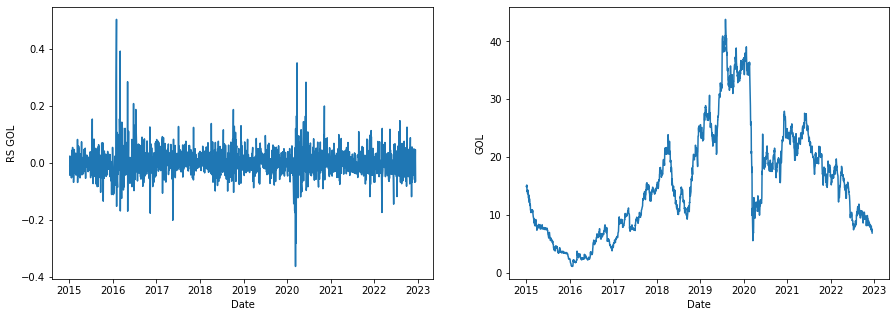

In [ ]:
fig, x = plt.subplots(1,2, figsize=(15, 5))
sns.lineplot(ax = x[0], x = acoes_df.index, y = acoes_df["RS GOL"])
sns.lineplot(ax = x[1], x = acoes_df.index, y = acoes_df["GOL"])

- As ações da GOL ficaram em alta por muitos anos:
  - Entre 2016 até começo 2020, a ação saiu de um valor que estava próximo de 0 e chegou a um valor próximo de 40 reais! Ou seja, por 4 anos a ação só creceu!
  - Em um crutissímo espaço de tempo, que foi de Março de 2020 até Abril de 2022 ouve uma queda bruta, saindo de +-35 e indo até +- 5.
  - Mas quando analisamos de 04/2020 até 06/2021 a ação só cresceu!
  - Depois entre 06/2021 até 11/2022 temos uma nova queda acumulada bruta.

- Benévolo, perceba que, no geral, as ações da GOl no período entre 2015-2022 mais tiverem períodos de alta do que de baixa! Isso quer dizer que a baixa que estamos vivendo agora é só mais uma baixa abrupta e deve ser seguida por um alta posterior que durará anos, como já mostraram o gráfico do histórico.
- É por isso que a média anual de retorno da GOl é de 19%

Vamos calcular a Taxa de Retorno Anual Média para todas as empresas:

In [ ]:
for i in acoes_df[['RS GOL',	'RS CVC',	'RS WEGE',	'RS MAGALU',	'RS TOTVS',	'RS BOVA']].columns:
  RS = acoes_df[i].mean()*246*100
  print("Taxa de Retorno Anual Médio da empresa ", i, ": ", round(RS,2),"%")

Taxa de Retorno Anual Médio da empresa  RS GOL :  18.81 %
Taxa de Retorno Anual Médio da empresa  RS CVC :  0.91 %
Taxa de Retorno Anual Médio da empresa  RS WEGE :  28.93 %
Taxa de Retorno Anual Médio da empresa  RS MAGALU :  51.88 %
Taxa de Retorno Anual Médio da empresa  RS TOTVS :  17.36 %
Taxa de Retorno Anual Médio da empresa  RS BOVA :  12.76 %


A título de curiosidade vamos calcular a Taxa de Retorno Anual para o mesmo período 2015-2022:

In [ ]:
for i in acoes_df[['GOL',	'CVC',	"WEGE",	"MAGALU",	"TOTVS",	"BOVA"]].columns:
  RS = ((acoes_df[i][len(acoes_df) - 1] - acoes_df[i][0])/acoes_df[i][0])*100
  print("Taxa de Retorno Anual da empresa ", i, ": ", round(RS,2),"%")

Taxa de Retorno Anual da empresa  GOL :  -53.77 %
Taxa de Retorno Anual da empresa  CVC :  -72.7 %
Taxa de Retorno Anual da empresa  WEGE :  525.69 %
Taxa de Retorno Anual da empresa  MAGALU :  1029.67 %
Taxa de Retorno Anual da empresa  TOTVS :  119.8 %
Taxa de Retorno Anual da empresa  BOVA :  113.08 %


#3 - Taxa de Retorno Logaritimica

Usamos a Taxa de Retorno Simples RS, para fazer a comparação de retorno entre diferentes açoes em um período de interesse. Já a Taxa de Retorno logaritmica é usada quando queremos comparar o retorno da mesma ação mas em períodos diferentes!

Bom pelo menos é o que recomendam os profissionais de finanças, ele dizem que é mais adequado usar a taxa de Retorno logaritmica quando formos fazer comparações na mesma ação mas em períodos diferentes. Agora vamos ao cáculo:




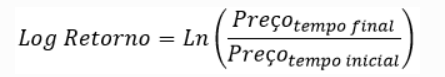

Aqui devemos entender que:

- Preco Tempo Final = Preco Final recebido, ou seja, é a composição de dinhero que manipulamos no final, ou seja, é a composição entre:
  - Valor Final da ação.
  - Ganho por dividendo no periodo.
  - Valor gasto na Taxa de venda da ação.
- Preco Tempo Inicial =  É o valor inical gasto, aqui estão inclusos:
  - O valor gasto com a compra.
  - A taxas gastas com as compras das ações.


EXEMPLO:

Vamos fazer o cálculo da retorno logaritmico para as ações da GOL no período entre 01/01/2015 até 09/12/2022:

In [ ]:
acoes_df["GOL"][len(acoes_df) - 1] # Valor da acao dia 12/01/2022

6.929999828338623

In [ ]:
acoes_df["GOL"][0]

14.989999771118164

In [ ]:
np.log(acoes_df["GOL"][len(acoes_df) - 1]/acoes_df["GOL"][0])*100

-77.15235084144878

Isso, porque não sabemos dos gastos com a corretagem. Para título de exemplo digamos que:

- Taxa de Compra = 10,00
- Taxa de Venda = 2,50
- Dividendos pago pela GOL = 0,25
- Número de ações compradas = 1000

Com este cenário, o cálculo do retorno logaritmico fica:

 - Preco inicial = 14.99 * 1000 + 10.00 = 15.000
 - Preco Final = 7.28 * 1000 + 0.25 * 1000 - 2.5  = 7.527.5

Logo, neste cenário o retorno logaritmico será:

In [ ]:
np.log(7527.5/15000)*100

-68.94872197284582

##3.1 - Comparação Retorno Simples e Retorno logaritmico

In [ ]:
len(acoes_df)

1977

Sabemos apenas com olhar para as formulas dos dois retornos que de fato eles não darão os mesmos valores. A título de comparação, vamos calcular os retornos simples e logaritmico para o mesmo período de tempo, no caso será de 2015-2022:


In [ ]:
np.log10(acoes_df["GOL"][len(acoes_df) - 1]/acoes_df["GOL"][0])*100
for i in acoes_df[['GOL',	'CVC',	"WEGE",	"MAGALU",	"TOTVS",	"BOVA"]].columns:
  RS = ((acoes_df[i][len(acoes_df) - 1] - acoes_df[i][0])/acoes_df[i][0])*100
  RL = np.log(acoes_df[i][len(acoes_df) - 1]/acoes_df[i][0])*100
  print("Empresa ", i, ", RS: ", round(RS,2),"%       Taxa de Retorno log: ", round(RL,2), "%")

Empresa  GOL , RS:  -53.77 %       Taxa de Retorno log:  -77.15 %
Empresa  CVC , RS:  -72.7 %       Taxa de Retorno log:  -129.82 %
Empresa  WEGE , RS:  525.69 %       Taxa de Retorno log:  183.37 %
Empresa  MAGALU , RS:  1029.67 %       Taxa de Retorno log:  242.45 %
Empresa  TOTVS , RS:  119.8 %       Taxa de Retorno log:  78.76 %
Empresa  BOVA , RS:  113.08 %       Taxa de Retorno log:  75.65 %


Você pode ver para as duas taxa de retorno e podemos ver que elas são diferentes... Então fica o grande questionamento, porque vamos usar o retorno logaritmico?

##3.2 - Mas por que usar o retorno logaritimico?



Você pode ver para as duas taxa de retorno e podemos ver que elas são diferentes... Então fica o grande questionamento, porque vamos usar o retorno logaritmico?

Benévolo, porque manipular o retorno logaritmico é muito mais facil que manipular o retorno simples/linear! Isso ocorre em várias situações, aqui vamos citar as principais:

- ***Cálculo do montante sabendo apenas a média do retorno do período:***
  - Digamos que temos as seguinte situação.
  - 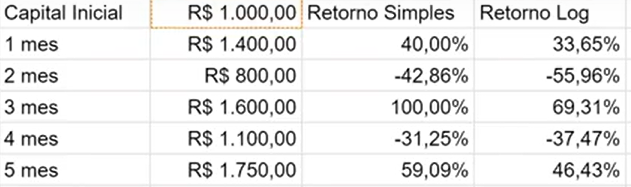
  - O que temosna imagem acima são os retornos diários simples e logaritmicos.
  - Se calcularmos a média de retorno no período para os dois tipos de retorno, poderemos ver:
    - Média retorno simples/linear = 25%
    - Média retorno Log = 11,19%
  - Sabendo dessas taxas de retorno médio nesse período de 5 meses, vamos fazer sobre o valor inicial, o calculo para tentar prever o montante.
    - Benévolo, veja que a conta mais intuitiva para essa conta seria:
    - (valor inicial) * (1 + Taxa média do período)^(número de meses)

    

Vamos fazer isso com as médias das duas taxas:

In [ ]:
1000*(1.25)**(5)

3051.7578125

aplicar essa conta intuitiva usando a taxa média do período não dá certo! Veja que ele nos retornou que o montante final é 3051 e na verdade é 1750. Benévolo, não dá para usar a taxa média do RS de forma simples para chegar no montante final. Já se usamos a média do RL podemos calcular o montante de forma simples com a seguinte formula:

- Montante = (valor incial) * (e^([Número meses] * [média RL]))

In [ ]:
1000*((np.e)**(5*0.1119))

1749.797382843548

#4 - Retorno da Carteira/Retorno Esperado da Carteira

Benévolo a primeira coisa que devemos nos ater é saber que na maioria das vezes Retorno de uma carteira e o Retorno esperado da mesma significa a mesma coisa.Existem várias formas de se calcular o retorno esperado de uma carteira, mas todas giram entorno do conceito de média ponderada dos retornos das ações. Vamos usar os cálculos de retornos dos ativos individuais que já havimos calculados nos tópicos anteriores:

Já haviamos calculado o Retorno Simples - RS -  diário das ações da nossa carteira como podemos ver:

In [ ]:
acoes_df

,GOL,CVC,WEGE,MAGALU,TOTVS,BOVA,RS GOL,RS CVC,RS WEGE,RS MAGALU,RS TOTVS,RS BOVA
Date,,,,,,,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-08,7.52,4.30,37.200001,2.840000,27.040001,103.570000,-0.068154,-0.102296,-0.001610,-0.034014,-0.019224,-0.019131
2022-12-09,7.28,4.25,37.099998,2.800000,26.760000,103.900002,-0.031915,-0.011628,-0.002688,-0.014084,-0.010355,0.003186
2022-12-12,7.62,4.26,36.070000,2.800000,26.080000,101.660004,0.046703,0.002353,-0.027763,0.000000,-0.025411,-0.021559


e já haviamos calculado o retorno anual médio como mostra o código:

In [ ]:
for i in acoes_df[['RS GOL',	'RS CVC',	'RS WEGE',	'RS MAGALU',	'RS TOTVS',	'RS BOVA']].columns:
  RS = acoes_df[i].mean()*246*100
  print("Taxa de Retorno Anual Médio da empresa ", i, ": ", round(RS,2),"%")

Taxa de Retorno Anual Médio da empresa  RS GOL :  18.81 %
Taxa de Retorno Anual Médio da empresa  RS CVC :  0.91 %
Taxa de Retorno Anual Médio da empresa  RS WEGE :  28.93 %
Taxa de Retorno Anual Médio da empresa  RS MAGALU :  51.88 %
Taxa de Retorno Anual Médio da empresa  RS TOTVS :  17.36 %
Taxa de Retorno Anual Médio da empresa  RS BOVA :  12.76 %


ou de maneira mais simples:

In [ ]:
retorno_anual_medio = acoes_df[['RS GOL',	'RS CVC',	'RS WEGE',	'RS MAGALU',	'RS TOTVS',	'RS BOVA']].mean()*246*100
retorno_anual_medio

RS GOL       18.813866
RS CVC        0.914415
RS WEGE      28.934124
RS MAGALU    51.884061
RS TOTVS     17.361183
RS BOVA      12.757534
dtype: float64

Mas perceba que calculamos o retorno decada ação dentro da carteira e não o retorno da carteira em sí! Ou seja, até agora não usamos um número que consiga resumir a rentabilidade da carteira num determinado período com todas as suas ações!

O que o economistas fazem é usar a Taxa de Retorno Anual Média para compor um Taxa Final de Retorno Anual Média da Carteira! E isso é feito da forma mais simples e intuitiva possível! Para cada empresa dentro da carteira, são atribuidos pessos. Esses pessos podem ser feitos levando em consideração os seguintes critérios:

- Quantidade de ações da empresa na carteira (o mais comum).
 - Por exemplo, digamos que uma carteira é composta por 3 empresas/ações, da empresa A, B e C.
    - Na carteira compramos as seguintes quantidades em ações:
    - 50% das ações compradas foram da A, logo A tem 50% de peso.
    - 20% das ações compradas foram da B, logo B tem 20% de peso.
    - 30% das ações compradas foram da C, logo C tem 30% de peso.

- Quantidade de dinheiro investido na empresa dentro da carteira.
  - Por exemplo, digamos que uma carteira é composta por 3 empresas/ações, da empresa A, B e C.
    - Na carteira gastamos os seguintes valores em ações:
    - 50% do dinheiro investido foi para A, logo A tem 50% de peso.
    - 20% do dinheiro investido foi para B, logo B tem 20% de peso.
    - 30% do dinheiro investido foi para C, logo C tem 30% de peso.

Vamos fazer exemplos com a nossa carteira de ações baseados em pesos por quantdade de ações:



---


**Exemplo 1 - Todos tem o mesmo peso**

Neste exemplo, vamos supor que temos a mesma quantidade de ações para cada empresa, se temos 5 empresas na nossa carteira (GOL, CVC, WEGE, MAGALU, TOTVS), logo cada empresa terá 20% de peso. Para calcular o retorno anual médio da carteira basta fazer o somatório do produto do Retorno Anual Médio de cada empresa pelo seu peso. De forma mais didática:

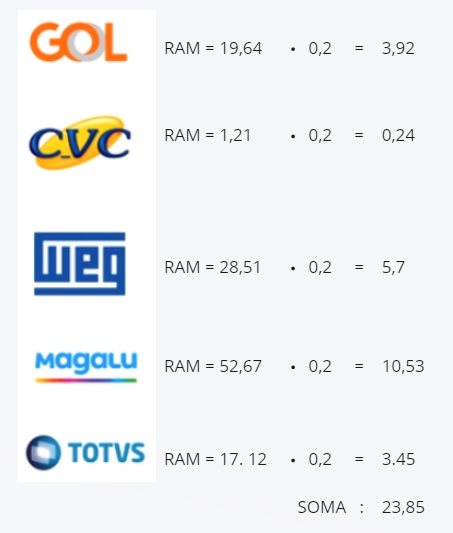

Benévolo note 2 coisas:
- A Rentabilidade Anual Média da carteira é de 23,85%
- O peso da Magalu é o maior de todos, ele tem um peso de 10,53% dos 23,85% totais de rentabildade. Ou seja, da rentabilidade total da carteira quase a metade veio da Magalu.
- Ou seja, A RENTABILIDADE DE UMA CARTEIRA DENTRO DE UM PERÍODO É A MÉDIA PONDERADA DAS RENTABILIDADES DOS ATIVOS DENTRO DA CARTEIRA.

Em formato matemático:

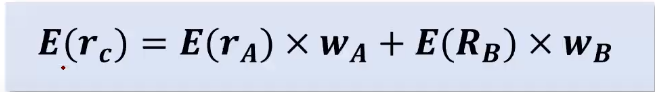

Traduzindo:

- E(rc) também representado como Rp --> Retorno esperado da carteira.
- R(ra) --> Retorno esperado do ativo A.
- Wa --> Peso do ativo A dentro da carteira.
- E(rb) --> Retorno esperado do ativo B.
- Wb --> Peso do ativo B dentro da carteira.

Se os retornos forem em porcentagem, ou seja, Ra e Rb forem em porcentagem, o retorno esperado da carteira também sera em porcentagem. Por exemplo:

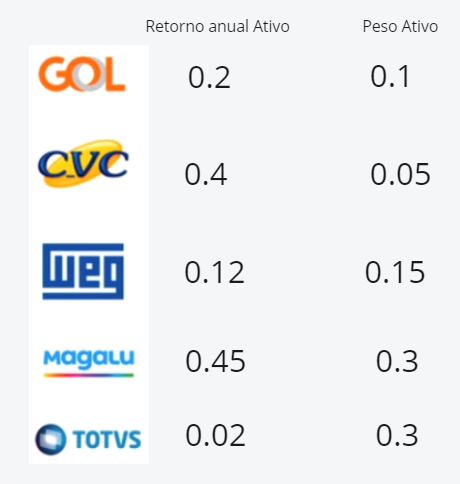

*Este valores de Retornos anuais são ficcios, apenas de exemplo.

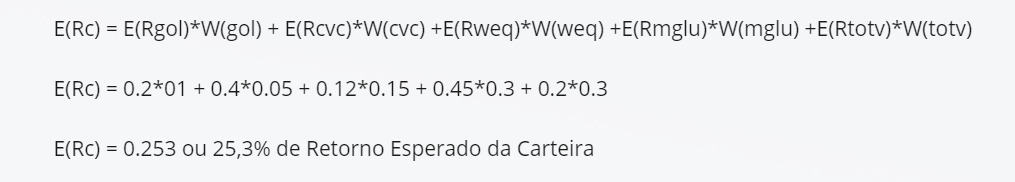

Em python:

In [ ]:
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
retorno_anual_medio[:len(retorno_anual_medio) - 1] * pesos

RS GOL        3.762773
RS CVC        0.182883
RS WEGE       5.786825
RS MAGALU    10.376812
RS TOTVS      3.472237
dtype: float64

In [ ]:
retorno_anual_medio_carteira01 = (retorno_anual_medio[:len(retorno_anual_medio) - 1] * pesos).sum()
retorno_anual_medio_carteira01

23.581529844426356



---

**Exemplo 2 - Pesos diferentes**:

Digamos que, neste exemplo a pessoa procurou se informar melhor na hora de compor sua carteira de ações e decidiu comprar mais ações da Magalu, ou seja, dentro da carteira dele as ações de magalu tem maior peso. Veja a composição da carteira:

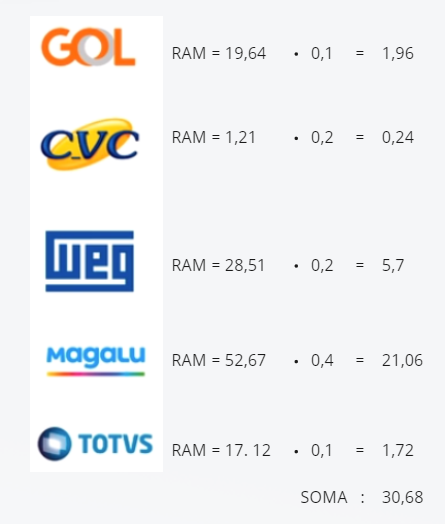

Note que:
- Quando aumentamos a proporção de ações de Magalu (quando aumentamos o peso) dentro da carteira, nossa rentabilidade Anual Média da carteira também aumenta. Saímos de um Retorno Anual Médio 23% para um de 30%!
- O que faz todo sentido, pois se aumentamos a participação da ação que mais se valorizou, ele vai puxar para cima todo o rendimento da carteira!

Em python:

In [ ]:
pesos = np.array([0.1, 0.2, 0.2, 0.4, 0.1])
retorno_anual_medio[:len(retorno_anual_medio) - 1] * pesos

RS GOL        1.881387
RS CVC        0.182883
RS WEGE       5.786825
RS MAGALU    20.753624
RS TOTVS      1.736118
dtype: float64

In [ ]:
retorno_anual_medio_carteira02 = (retorno_anual_medio[:len(retorno_anual_medio) - 1] * pesos).sum()
retorno_anual_medio_carteira02

30.34083704780823

##4.1 - Gráfico Carteira

O que vamos fazer é plotar o gráfico de rendimento diário da nossa carteira. Vamos fazer isso do jeito mais intuitivo, isto é, o rendimento diário de uma carteira de ações é a média do rendimento diário de cada dia.
Vamos fazer isso com a nossa carteira como exemplo:

In [ ]:
acoes_df

,GOL,CVC,WEGE,MAGALU,TOTVS,BOVA,RS GOL,RS CVC,RS WEGE,RS MAGALU,RS TOTVS,RS BOVA
Date,,,,,,,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-08,7.52,4.30,37.200001,2.840000,27.040001,103.570000,-0.068154,-0.102296,-0.001610,-0.034014,-0.019224,-0.019131
2022-12-09,7.28,4.25,37.099998,2.800000,26.760000,103.900002,-0.031915,-0.011628,-0.002688,-0.014084,-0.010355,0.003186
2022-12-12,7.62,4.26,36.070000,2.800000,26.080000,101.660004,0.046703,0.002353,-0.027763,0.000000,-0.025411,-0.021559


Já sabemos que para avaliar o rendimento de ações devemos fixar um ponto de comparação e no nosso caso será o valor da ação no dia da compra, ou seja, no dia 02/01/2015. A partir do preço da ação naquele dia vamos normalizar o preço da ação nos demais dias em relação a ela, ou seja, vamos dividir o preço da ação dos demais dias com o preço incial de compra:


In [ ]:
acoes_normalizado_rendimento = pd.DataFrame()
for i in acoes_df[['GOL',	'CVC', 	'WEGE', 	'MAGALU', 'TOTVS', 'BOVA'	]]:
  acoes_normalizado_rendimento[i] = acoes_df[i] / acoes_df[i][0]
acoes_normalizado_rendimento

,GOL,CVC,WEGE,MAGALU,TOTVS,BOVA
Date,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832
2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449
...,...,...,...,...,...,...
2022-12-08,0.501668,0.282895,6.280520,12.198683,2.270227,2.191494
2022-12-09,0.485657,0.279605,6.263637,12.026871,2.246719,2.198477
2022-12-12,0.508339,0.280263,6.089741,12.026871,2.189627,2.151079


Como dito anteriormente, ao rendimento diário da carteira é a media ponderada dos rendimentos diários daquele dia das ações que compôe a carteira. No nosso exmplo, como toda as ações tem o mesmo peso, estamos lidando com média simples:

In [ ]:
acoes_normalizado_rendimento["CARTEIRA"] = (acoes_normalizado_rendimento["GOL"] + acoes_normalizado_rendimento["CVC"] + acoes_normalizado_rendimento["WEGE"]
                                            + acoes_normalizado_rendimento["MAGALU"] + acoes_normalizado_rendimento["TOTVS"])/5
acoes_normalizado_rendimento

,GOL,CVC,WEGE,MAGALU,TOTVS,BOVA,CARTEIRA
Date,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110,0.994477
2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612,0.978854
2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832,0.971492
2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449,0.966805
...,...,...,...,...,...,...,...
2022-12-08,0.501668,0.282895,6.280520,12.198683,2.270227,2.191494,4.306799
2022-12-09,0.485657,0.279605,6.263637,12.026871,2.246719,2.198477,4.260498
2022-12-12,0.508339,0.280263,6.089741,12.026871,2.189627,2.151079,4.218968


Vamos plotar isso num gráfico de linha imterativo:

In [ ]:
fig = px.line(title = "Rendimento Carteira")
for i in acoes_normalizado_rendimento.columns:
  fig.add_scatter(x = acoes_normalizado_rendimento.index, y = acoes_normalizado_rendimento[i], name = i)
fig.show()

Com o gráfico, podemos perceber que as ações da MAGALU puxaram o rendimento da carteira para cima no mesmo período em que as ações da MAGALU subiram.

#5 - Retorno Carteira Vs Retorno Bovespa/Bova11

Para vermos se nossa carteira é boa ou não, temos que comparar o Retorno Médio Anual da Carteira com o Retorno Médio Anual de uma índice, esse indíce pode ser a Bova, que nada mais é que "uma carteira com a principais empresas no Brasil", ou comprar com o índice da Bovespa que é a média dos Retornos Anuais Médios de todas as empresas negociadas na B3.

- Note que, se o Retorno Anual Médio da nossa carteira for maior que o Retorno Anual de algum índice, isso significa que nossa carteira é boa!

- Se o Retorno Anual Médio da nossa carteira for igual que o Retorno Anual de algum índice, isso significa que nossa carteira é ruim/medíocre! Pois ela não se diferencia das demais empresas da bolsa.

- Se o Retorno Anual Médio da nossa carteira for menor que o Retorno Anual de algum índice, isso significa que nossa carteira é Pessíma! Pois ela está tendo retorno anual médio menor que demais empresas da bolsa.

Vamos comparar os Retornos das duas carteiras com o retorno da Bova11, que é um índice bastante usado no mercado de ações brasileiro:

In [ ]:
retorno_anual_medio_bova = retorno_anual_medio[len(retorno_anual_medio) - 1]
retornos_anuais_medios = pd.DataFrame({"Retorno Anual Médio": [retorno_anual_medio_carteira01, retorno_anual_medio_carteira02,retorno_anual_medio_bova]}, index = ["Carteia01", "Carteira02", "Bova11"])
retornos_anuais_medios

,Retorno Anual Médio
Carteia01,23.581530
Carteira02,30.340837
Bova11,12.757534


Ou seja, qualquer uma das nossas carteiras tem perfomace considerado Bom.

Podemos comprar o desempenho entre as carteiras e o indíce BOVA, para vermos se históricamente elas performaram melhor do que a BOVA no rendimento diário.

Lembrando que já tinhamos feito um dataset que continha o rendimento diário da BOVA e da carteira01:

In [ ]:
acoes_normalizado_rendimento.head(5)

,GOL,CVC,WEGE,MAGALU,TOTVS,BOVA,CARTEIRA
Date,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110,0.994477
2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612,0.978854
2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832,0.971492
2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449,0.966805


Vamos fazer um dataframe para nossa carteira02, que tem pesos diferentes para as ações de cada empresa:

In [ ]:
# Pesos: 0.1, 0.2, 0.2, 0.4, 0.1
acoes_normalizado_rendimento["CARTEIRA02"] = (acoes_normalizado_rendimento["GOL"]*0.1 + acoes_normalizado_rendimento["CVC"]*0.2 + acoes_normalizado_rendimento["WEGE"]*0.2
                                            + acoes_normalizado_rendimento["MAGALU"]*0.4 + acoes_normalizado_rendimento["TOTVS"]*0.1)
acoes_normalizado_rendimento

,GOL,CVC,WEGE,MAGALU,TOTVS,BOVA,CARTEIRA,CARTEIRA02
Date,,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110,0.994477,1.002242
2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612,0.978854,0.987595
2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832,0.971492,0.991990
2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449,0.966805,0.985465
...,...,...,...,...,...,...,...,...
2022-12-08,0.501668,0.282895,6.280520,12.198683,2.270227,2.191494,4.306799,6.469346
2022-12-09,0.485657,0.279605,6.263637,12.026871,2.246719,2.198477,4.260498,6.392635
2022-12-12,0.508339,0.280263,6.089741,12.026871,2.189627,2.151079,4.218968,6.354546


Plotando o gráfico com os rendimentos diários das carteiras e do índice BOVA:

In [ ]:
fig = px.line(title = "Rendimento Carteira")
for i in acoes_normalizado_rendimento[["CARTEIRA", "CARTEIRA02", "BOVA"]].columns:
  fig.add_scatter(x = acoes_normalizado_rendimento.index, y = acoes_normalizado_rendimento[i], name = i)
fig.show()

Perceba que:

- A carteira02, que tem um peso de 40% nas ações da MAGALU, é altamente influenciada pelo rendimento das ações da MAGALU, ou seja, quando elas tem forte alta a carteira02 tem um alta maior que a carteira01!

#Exercício II

Neste exercício II, vamos calcular tudo que aprendemos neste módulo mas para a carteira de ações que geramos no exercício I. Ou seja, vamos calcular:

- Retorno Simples diário das ações
- Retorno Anual das ações
- Retorno Anual Médio das ações
- Retorno Anual Médio da Carteira exercício
- Retorno Anual logaritmico das ações
- Compara Rendimento da carteira exercício com o rendimento da BOVA11

##RESOLUÇÂO

### Retorno Simples Diário

Calculando o Retorno Simples Diário das ações

In [ ]:
acoes02 = ["ABEV3.SA", "VIVT3.SA", "ODPV3.SA", "PETR4.SA", "BBAS3.SA", "BOVA11.SA"]

In [ ]:
acoes02_df = pd.DataFrame()
for i in acoes02:
  acoes02_df[i] = yf.download(i, start='2015-01-01')['Close']
acoes02_df

acoes02_df.rename(columns = {"ABEV3.SA":"Ambev", "VIVT3.SA":"Vivo", "ODPV3.SA":"Odontoprev", "PETR4.SA":"Petrobras", "BBAS3.SA":"Banco do Brasil", "BOVA11.SA":"BOVA11"}, inplace = True)
acoes02_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Ambev,Vivo,Odontoprev,Petrobras,Banco do Brasil,BOVA11
Date,,,,,,
2015-01-02,16.020000,37.820000,9.37,9.360000,22.650000,47.259998
2015-01-05,15.730000,37.070000,9.62,8.560000,22.180000,46.320000
2015-01-06,16.330000,36.150002,9.55,8.280000,22.490000,46.580002
2015-01-07,16.559999,37.389999,9.69,8.670000,23.480000,48.150002
2015-01-08,16.540001,38.910000,9.66,9.230000,23.559999,48.509998
...,...,...,...,...,...,...
2022-12-08,15.700000,37.130001,8.57,24.780001,35.029999,103.570000
2022-12-09,15.510000,37.599998,8.50,24.709999,34.980000,103.900002
2022-12-12,15.240000,37.509998,8.33,23.910000,33.790001,101.660004


Como os nosso valores de ação diárias são os valores de fechamento do pregão, para calcular o Retorno Simples Diário, que nada mais é que o LUCRO/VALOR_INCIAL, vamos usar a seguinte lógica:

- Valor de compra do dia é o valor de fechamento do dia anterior.
- Valor de venda do dia é o próprio valor que consta na tabela, que é o valor de fechamento.
- Logo neste caso podemos afirmar que:
  - RS = LUCRO/VALOR_INCIAL
  - RS = (Valor_Fechamento_Atual - Valor_Fechamento_Dia_Anterior)/Valor_Fechamento_Atual

Sabendo disso podemos montar os Retornos Simples Diários:

In [ ]:
acoes02_df.shift().head()

,Ambev,Vivo,Odontoprev,Petrobras,Banco do Brasil,BOVA11
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,16.020000,37.820000,9.37,9.36,22.65,47.259998
2015-01-06,15.730000,37.070000,9.62,8.56,22.18,46.320000
2015-01-07,16.330000,36.150002,9.55,8.28,22.49,46.580002
2015-01-08,16.559999,37.389999,9.69,8.67,23.48,48.150002


In [ ]:
RS_carteira02 = pd.DataFrame()
for i in acoes02_df.columns:
  RS_carteira02[i] =  (acoes02_df[i] - acoes02_df[i].shift())/acoes02_df[i].shift()
RS_carteira02

,Ambev,Vivo,Odontoprev,Petrobras,Banco do Brasil,BOVA11
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018102,-0.019831,0.026681,-0.085470,-0.020751,-0.019890
2015-01-06,0.038144,-0.024818,-0.007276,-0.032710,0.013977,0.005613
2015-01-07,0.014084,0.034301,0.014660,0.047101,0.044020,0.033705
2015-01-08,-0.001208,0.040653,-0.003096,0.064590,0.003407,0.007477
...,...,...,...,...,...,...
2022-12-08,-0.018750,-0.032317,-0.005800,-0.022485,-0.012683,-0.019131
2022-12-09,-0.012102,0.012658,-0.008168,-0.002825,-0.001427,0.003186
2022-12-12,-0.017408,-0.002394,-0.020000,-0.032376,-0.034019,-0.021559


Analisando o retorno simples de cada empresa na carteira:

In [ ]:
RS_carteira02.describe()

,Ambev,Vivo,Odontoprev,Petrobras,Banco do Brasil,BOVA11
count,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,0.000123,0.000170,0.000140,0.000956,0.000547,0.000519
std,0.017414,0.018769,0.019979,0.032472,0.027744,0.016408
min,-0.157818,-0.123589,-0.111184,-0.296978,-0.211712,-0.145747
25%,-0.008766,-0.009797,-0.010995,-0.014579,-0.013730,-0.007732
50%,0.000000,-0.000197,0.000000,0.001014,0.000000,0.000909
75%,0.009171,0.009958,0.011747,0.016989,0.014575,0.009586
max,0.098712,0.123216,0.111029,0.222222,0.171261,0.133951


Vemos que a média de retorno simples no périodo de 2015-2022 é negativo para todas as empresas!


Plotando o Retorno simples diário de cada ação:

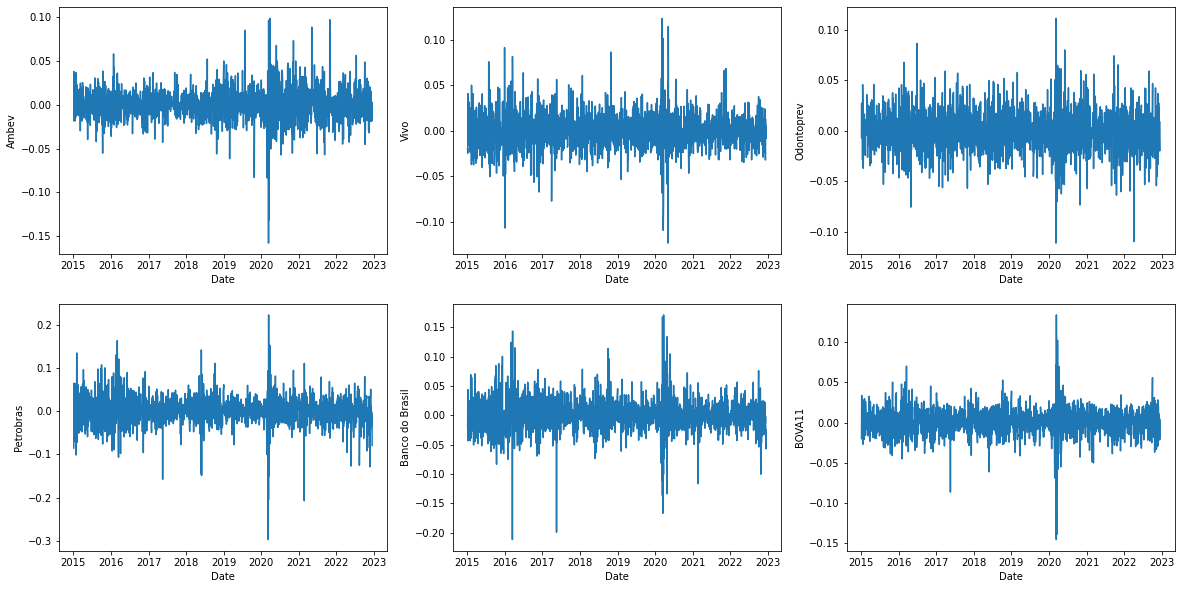

In [ ]:
fig, x = plt.subplots(2,3, figsize=(20, 10))
sns.lineplot(ax = x[0,0], x = RS_carteira02.index, y = RS_carteira02["Ambev"])
sns.lineplot(ax = x[0,1], x = RS_carteira02.index, y = RS_carteira02["Vivo"])
sns.lineplot(ax = x[0,2], x = RS_carteira02.index, y = RS_carteira02["Odontoprev"])
sns.lineplot(ax = x[1,0], x = RS_carteira02.index, y = RS_carteira02["Petrobras"])
sns.lineplot(ax = x[1,1], x = RS_carteira02.index, y = RS_carteira02["Banco do Brasil"])
sns.lineplot(ax = x[1,2], x = RS_carteira02.index, y = RS_carteira02["BOVA11"])

###Retorno Simples Anual

Como já foi visto na explicação, po retorno anual simples pode ser visto da mesma forma que o retorno simples diário, ou seja, o retorno anual simples é dado por:

 - RSA = (Valor de venda - Valor de compra)/ valor de compra

Logo calculando o retorno simples anual temos:

In [ ]:
for i in acoes02_df.columns:
  RSA = (acoes02_df[i][len(acoes02_df) - 1] - acoes02_df[i][0])/acoes02_df[i][0]
  RSA = RSA*100
  print("Retorno Anual Simples da empresa ", i, ": ", round(RSA,2), "%")

Retorno Anual Simples da empresa  Ambev :  -5.56 %
Retorno Anual Simples da empresa  Vivo :  -1.16 %
Retorno Anual Simples da empresa  Odontoprev :  -11.21 %
Retorno Anual Simples da empresa  Petrobras :  129.38 %
Retorno Anual Simples da empresa  Banco do Brasil :  37.17 %
Retorno Anual Simples da empresa  BOVA11 :  113.08 %


Ou seja, percebemos que a única empresa dentro da carteira que teve um desempenho maior que o desempenho do índice BOVA no período, foi a Petrobras

###Retorno Anual Médio

Como já sabemos, o retorno anual médio de um conjunto de ações pode dentro de um período (esse período deve ser igual o maior que uma ano) pode ser calculado com a média do Retorno Simples - RS -  multiplicado pelo número de dias uteis no ano, que são 246.

Vazendo o calculo do Retorno Anual Médio para cada ação dentro da carteira temos:

In [ ]:
for i in RS_carteira02.columns:
  RAM = RS_carteira02[i].mean() *246*100
  print("Retorno Anual Médio da empresa ", i, ": ", round(RAM,2), "%")

Retorno Anual Médio da empresa  Ambev :  3.03 %
Retorno Anual Médio da empresa  Vivo :  4.18 %
Retorno Anual Médio da empresa  Odontoprev :  3.44 %
Retorno Anual Médio da empresa  Petrobras :  23.53 %
Retorno Anual Médio da empresa  Banco do Brasil :  13.46 %
Retorno Anual Médio da empresa  BOVA11 :  12.76 %


O que tiramos daqui é o seguinte:
- O banco do Brasil tem um Retorno Anual Médio acima do BOVA, mesmo hoje em dia ele tendo um Retorno simples anual de 37%. Isso quer dizer que ele vem de uma baixa de preco nos ultimos meses/dias, mas que o normal dele é ter um crescimento maior que a BOVA na média.
- Petobras, apresenta uma crescimento anual médio de 23,5%, o dobro da BOVA, mas seu retorno anual simples é quase o mesmo da BOVA. Isso quer dizer que ouve um breve perído em que as ações da petrobras cairam muito.

###Retorno Logaritmico

Lembrando que o retorno logaritmico é indicado quando queremos fazer a comparação da mesma ação mas em períodos diferentes. Por enquanto vamos aprender a como calcular o retorno logaritmico diário e anual:

In [ ]:
acoes02_df.head()

,Ambev,Vivo,Odontoprev,Petrobras,Banco do Brasil,BOVA11
Date,,,,,,
2015-01-02,16.020000,37.820000,9.37,9.36,22.650000,47.259998
2015-01-05,15.730000,37.070000,9.62,8.56,22.180000,46.320000
2015-01-06,16.330000,36.150002,9.55,8.28,22.490000,46.580002
2015-01-07,16.559999,37.389999,9.69,8.67,23.480000,48.150002
2015-01-08,16.540001,38.910000,9.66,9.23,23.559999,48.509998


O retorno logaritmo entre dentro de um período é o logaritmo natual  da divisão entre o valor de venda com o valor de compra, em símbolos temos:

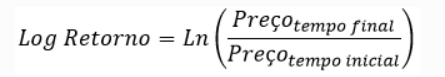

In [ ]:
RL_acoes02 = pd.DataFrame()
for i in  acoes02_df.columns:
  RL_acoes02[i] = np.log(acoes02_df[i]/acoes02_df[i].shift())
RL_acoes02

,Ambev,Vivo,Odontoprev,Petrobras,Banco do Brasil,BOVA11
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018268,-0.020030,0.026331,-0.089345,-0.020969,-0.020090
2015-01-06,0.037434,-0.025131,-0.007303,-0.033257,0.013880,0.005597
2015-01-07,0.013986,0.033726,0.014553,0.046026,0.043078,0.033150
2015-01-08,-0.001208,0.039848,-0.003101,0.062590,0.003401,0.007449
...,...,...,...,...,...,...
2022-12-08,-0.018928,-0.032851,-0.005817,-0.022742,-0.012764,-0.019316
2022-12-09,-0.012176,0.012579,-0.008202,-0.002829,-0.001428,0.003181
2022-12-12,-0.017561,-0.002396,-0.020203,-0.032911,-0.034612,-0.021795


Calculando o retorno anual logaritmico temos:

In [ ]:
for i in acoes02_df.columns:
  RL = np.log(acoes02_df[i][len(acoes02_df)-1]/acoes02_df[i][0])
  RL = RL*100
  print("Retorno Anual Logaritmico da empresa ", i, ": ", round(RL,2),"%")

Retorno Anual Logaritmico da empresa  Ambev :  -5.72 %
Retorno Anual Logaritmico da empresa  Vivo :  -1.17 %
Retorno Anual Logaritmico da empresa  Odontoprev :  -11.89 %
Retorno Anual Logaritmico da empresa  Petrobras :  83.02 %
Retorno Anual Logaritmico da empresa  Banco do Brasil :  31.61 %
Retorno Anual Logaritmico da empresa  BOVA11 :  75.65 %


###Retorno Simples Diário da Carteira

O Retorno Diário dessa Carteira de ações, para cada dia, nada mais é que a média ponderada dos Retornos Diários Simples das ações que compões a carteira. No nosso exemplo, todas as ações tem o mesmo peso, logo a média pondera vira uma média simples:

In [ ]:
RS_carteira02

,Ambev,Vivo,Odontoprev,Petrobras,Banco do Brasil,BOVA11
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018102,-0.019831,0.026681,-0.085470,-0.020751,-0.019890
2015-01-06,0.038144,-0.024818,-0.007276,-0.032710,0.013977,0.005613
2015-01-07,0.014084,0.034301,0.014660,0.047101,0.044020,0.033705
2015-01-08,-0.001208,0.040653,-0.003096,0.064590,0.003407,0.007477
...,...,...,...,...,...,...
2022-12-08,-0.018750,-0.032317,-0.005800,-0.022485,-0.012683,-0.019131
2022-12-09,-0.012102,0.012658,-0.008168,-0.002825,-0.001427,0.003186
2022-12-12,-0.017408,-0.002394,-0.020000,-0.032376,-0.034019,-0.021559


In [ ]:
RS_carteira02["CARTEIRA"] = (RS_carteira02["Ambev"] + RS_carteira02["Vivo"] + RS_carteira02["Odontoprev"] +
                             RS_carteira02["Petrobras"] + RS_carteira02["Banco do Brasil"])/5
RS_carteira02

,Ambev,Vivo,Odontoprev,Petrobras,Banco do Brasil,BOVA11,CARTEIRA
Date,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018102,-0.019831,0.026681,-0.085470,-0.020751,-0.019890,-0.023495
2015-01-06,0.038144,-0.024818,-0.007276,-0.032710,0.013977,0.005613,-0.002537
2015-01-07,0.014084,0.034301,0.014660,0.047101,0.044020,0.033705,0.030833
2015-01-08,-0.001208,0.040653,-0.003096,0.064590,0.003407,0.007477,0.020869
...,...,...,...,...,...,...,...
2022-12-08,-0.018750,-0.032317,-0.005800,-0.022485,-0.012683,-0.019131,-0.018407
2022-12-09,-0.012102,0.012658,-0.008168,-0.002825,-0.001427,0.003186,-0.002373
2022-12-12,-0.017408,-0.002394,-0.020000,-0.032376,-0.034019,-0.021559,-0.021239


In [ ]:
px.line(x =RS_carteira02.index, y=RS_carteira02["CARTEIRA"], title="Retorno Simples Diário da Carteira")

###Rendimento Diário da Carteira

O Rendimento diário da nossa carteira funciona de forma similar ao retorno diário da carteira, isto é, o rendimento diário da carteira é a média ponderada dos rendimentos daquele dia das ações que compõe a carteira. Mas ates devemos calcular o rendimento diário das ações:

In [ ]:
acoes02_normalizado = pd.DataFrame()
for i in acoes02_df.columns:
  acoes02_normalizado[i] = acoes02_df[i]/acoes02_df[i][0]
acoes02_normalizado

,Ambev,Vivo,Odontoprev,Petrobras,Banco do Brasil,BOVA11
Date,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.981898,0.980169,1.026681,0.914530,0.979249,0.980110
2015-01-06,1.019351,0.955844,1.019210,0.884615,0.992936,0.985612
2015-01-07,1.033708,0.988630,1.034152,0.926282,1.036645,1.018832
2015-01-08,1.032459,1.028821,1.030950,0.986111,1.040177,1.026449
...,...,...,...,...,...,...
2022-12-08,0.980025,0.981756,0.914621,2.647436,1.546578,2.191494
2022-12-09,0.968165,0.994183,0.907150,2.639957,1.544371,2.198477
2022-12-12,0.951311,0.991803,0.889007,2.554487,1.491832,2.151079


plotando o rendimento diário das ações da carteira:

In [ ]:
fig = px.line(title = "Rendimento Diário das ações")
for i in acoes02_normalizado.columns:
  fig.add_scatter(x = acoes02_normalizado.index, y = acoes02_normalizado[i], name=i)
fig.show()

Percebemos que, tirando as ações da Petrobrasm todas as ações rendem menos diáriamente que o índice BOVA.

Agora vamos calcular o Rendimento Diário da Carteira. Como já haviamos comentado o retorno diário da carteira é a média ponderada dos rendimentos diários daquele mesmo dia. Fazendo em python:

In [ ]:
acoes02_normalizado["CARTEIRA"] = (acoes02_normalizado['Ambev'] + acoes02_normalizado['Vivo'] + acoes02_normalizado['Odontoprev'] +
                                   acoes02_normalizado['Petrobras'] + acoes02_normalizado['Banco do Brasil'] )/5
acoes02_normalizado

,Ambev,Vivo,Odontoprev,Petrobras,Banco do Brasil,BOVA11,CARTEIRA
Date,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.981898,0.980169,1.026681,0.914530,0.979249,0.980110,0.976505
2015-01-06,1.019351,0.955844,1.019210,0.884615,0.992936,0.985612,0.974391
2015-01-07,1.033708,0.988630,1.034152,0.926282,1.036645,1.018832,1.003883
2015-01-08,1.032459,1.028821,1.030950,0.986111,1.040177,1.026449,1.023704
...,...,...,...,...,...,...,...
2022-12-08,0.980025,0.981756,0.914621,2.647436,1.546578,2.191494,1.414083
2022-12-09,0.968165,0.994183,0.907150,2.639957,1.544371,2.198477,1.410765
2022-12-12,0.951311,0.991803,0.889007,2.554487,1.491832,2.151079,1.375688


Plotando a linha de rendimento diário da carteira:

In [ ]:
fig = px.line(title = "Rendimento Diário das ações da Carteira 02")
for i in acoes02_normalizado.columns:
  fig.add_scatter(x = acoes02_normalizado.index, y = acoes02_normalizado[i], name=i)
fig.show()

Comparando o rendimento diário da carteira com o rendimento diário do índice BOVA:

In [ ]:
fig = px.line(title = "Rendimento Diário das ações da Carteira 02 VS BOVA11")
for i in acoes02_normalizado[["CARTEIRA", "BOVA11"]].columns:
  fig.add_scatter(x = acoes02_normalizado.index, y = acoes02_normalizado[i], name=i)
fig.show()

Vemos que nossa carteira exercício tem uma rendimento sempre abaixo do rendimento da BOVA11, ou seja, nossa carteira é considerada ruim!

###Retorno Anual Médio da Carteira

Como já vimos, o Retorno Anual Médio de uma carteira de ações nada mais é que a média ponderada das Médias Anuais de cada ação/empresa que compõe a ação. No nosso caso vamos considerar que as ações/empresas tem o mesmo peso, logo:

primeiro passo --> Calular a Taxa de Retorno Anual Média de cada empresa da carteira:

In [ ]:
RS_carteira02.head()

,Ambev,Vivo,Odontoprev,Petrobras,Banco do Brasil,BOVA11,CARTEIRA
Date,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018102,-0.019831,0.026681,-0.085470,-0.020751,-0.019890,-0.023495
2015-01-06,0.038144,-0.024818,-0.007276,-0.032710,0.013977,0.005613,-0.002537
2015-01-07,0.014084,0.034301,0.014660,0.047101,0.044020,0.033705,0.030833
2015-01-08,-0.001208,0.040653,-0.003096,0.064590,0.003407,0.007477,0.020869


In [ ]:
indice = ["Ambev",	"Vivo",	"Odontoprev",	"Petrobras",	"Banco do Brasil"]
coluna = [RS_carteira02["Ambev"].mean()*246*100, RS_carteira02["Vivo"].mean()*246*100, RS_carteira02["Odontoprev"].mean()*246*100,
          RS_carteira02["Petrobras"].mean()*246*100, RS_carteira02["Banco do Brasil"].mean()*246*100]
RAM_acoes02  = pd.DataFrame({"Rendimento Anual Médio %": coluna}, index=indice)
RAM_acoes02

,Rendimento Anual Médio %
Ambev,3.030953
Vivo,4.181165
Odontoprev,3.438141
Petrobras,23.527625
Banco do Brasil,13.456961


Agora vamos calcular o Retorno Anual Médio da carteira:

In [ ]:
RAM_acoes02.loc["Carteira"] = [RAM_acoes02["Rendimento Anual Médio %"].mean()]
RAM_acoes02

,Rendimento Anual Médio %
Ambev,3.030953
Vivo,4.181165
Odontoprev,3.438141
Petrobras,23.527625
Banco do Brasil,13.456961
Carteira,9.526969


Veja que o Retorno Anual Médio da nossa carteira de ações (onde cada empresa tem o mesmo peso) tem Retorno Anual Médio menor que o da Petrobras e a do Bando do Brasil. Isso quer dizer que as ações da Vivo, Ambav e Odontoprev puxam esse Média Anual de retorno para baixo!

In [ ]:
import pandas as pd

hist_selic = pd.read_csv("/content/taxa_selic_apurada.csv", sep = ";")
hist_selic

,Data,Taxa (% a.a.),Fator diário,Financeiro (R$),Operações,Média,Mediana,Moda,Desvio padrão,Índice de curtose,Unnamed: 10
0,16/12/2020,"1,9","1,00007469","1.212.662.374.842,57",816,"1,9","1,89","1,9","0,014","614,574",NaN
1,15/12/2020,"1,9","1,00007469","1.233.105.809.213,9",806,"1,9","1,89","1,9","0,014","529,805",NaN
2,14/12/2020,"1,9","1,00007469","1.210.420.497.952,12",810,"1,9","1,89","1,9","0,014","439,852",NaN
3,11/12/2020,"1,9","1,00007469","1.213.308.307.497,25",857,"1,9","1,89","1,9","0,015","378,247",NaN
4,10/12/2020,"1,9","1,00007469","1.315.351.937.157,14",768,"1,9","1,89","1,9","0,013","476,119",NaN
...,...,...,...,...,...,...,...,...,...,...,...
1489,08/01/2015,"11,65","1,00043739","562.543.989.917,33",1169,"11,65","11,64","11,65","0,021","441,13",NaN
1490,07/01/2015,"11,65","1,00043739","562.636.827.192,86",1185,"11,65","11,64","11,65","0,02","642,446",NaN
1491,06/01/2015,"11,65","1,00043739","535.489.610.699,18",1155,"11,65","11,64","11,65","0,028","342,75",NaN
1492,05/01/2015,"11,65","1,00043739","526.001.814.682,25",1123,"11,65","11,64","11,65","0,029","401,798",NaN


In [ ]:
hist_selic["Taxa (% a.a.)"] = hist_selic["Taxa (% a.a.)"].str.replace(",", ".")
hist_selic["Taxa (% a.a.)"] = hist_selic["Taxa (% a.a.)"].astype(float)
hist_selic["Taxa (% a.a.)"]

0        1.90
1        1.90
2        1.90
3        1.90
4        1.90
        ...  
1489    11.65
1490    11.65
1491    11.65
1492    11.65
1493    11.65
Name: Taxa (% a.a.), Length: 1494, dtype: float64

In [ ]:
hist_selic["Taxa (% a.a.)"].mean()

8.828915662650605